# Supermarket Sales Analysis

Este projeto tem como objetivo analisar dados de vendas de um supermercado,
extraindo insights sobre faturamento, produtos, categorias e comportamento dos clientes.

A análise busca apoiar decisões estratégicas relacionadas a vendas, precificação
e fidelização de clientes.

1 - Importando libs

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


2 - Carregando os dados do dataset

In [30]:
df = pd.read_csv("../data/sales.csv")
df.head()


,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


3 - Visão geral dos dados

In [31]:
df.shape


(1000, 12)

In [32]:
df.info()
df.describe()
df.columns


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   str    
 2   city              1000 non-null   str    
 3   customer_type     1000 non-null   str    
 4   gender            1000 non-null   str    
 5   product_name      1000 non-null   str    
 6   product_category  1000 non-null   str    
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), str(6)
memory usage: 93.9 KB


Index(['sale_id', 'branch', 'city', 'customer_type', 'gender', 'product_name',
       'product_category', 'unit_price', 'quantity', 'tax', 'total_price',
       'reward_points'],
      dtype='str')

4 - Conversão dos dados nulos

In [33]:
df.isnull().sum()

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

O dataset não apresenta valores nulos, o que reduz a necessidade de tratamentos
adicionais de limpeza de dados.

5 - Preparando os dados

In [34]:
df.dtypes


sale_id               int64
branch                  str
city                    str
customer_type           str
gender                  str
product_name            str
product_category        str
unit_price          float64
quantity              int64
tax                 float64
total_price         float64
reward_points         int64
dtype: object

In [35]:
cols_numericas = [
    "unit_price",
    "quantity",
    "tax",
    "total_price",
    "reward_points"
]

df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric)


6 - Análises Exploratórias

In [36]:
#faturamento total
df["total_price"].sum()


np.float64(118583.9)

In [37]:
#faturamento por cidade
df.groupby("city")["total_price"].sum().sort_values(ascending=False)

city
Chicago        42584.71
New York       40226.93
Los Angeles    35772.26
Name: total_price, dtype: float64

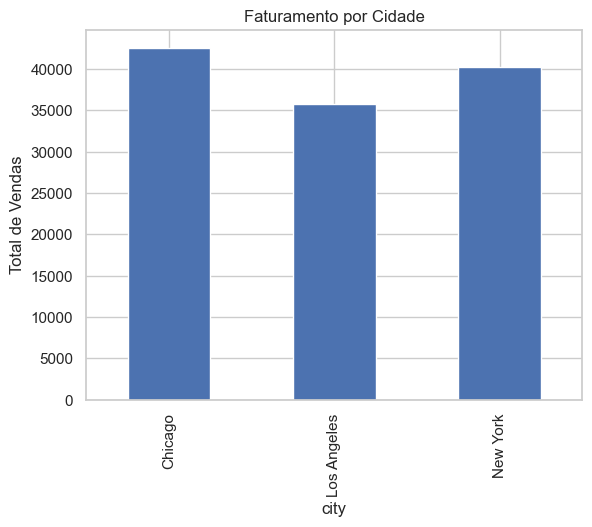

In [38]:
#grafico de faturamento por cidade
df.groupby("city")["total_price"].sum().plot(kind="bar")
plt.title("Faturamento por Cidade")
plt.ylabel("Total de Vendas")
plt.show()

In [39]:
#categorias mais vendidas (em quantidade)
df.groupby("product_category")["quantity"].sum().sort_values(ascending=False)

product_category
Fruits           2286
Personal Care    2278
Beverages        1952
Stationery       1913
Household        1908
Name: quantity, dtype: int64

In [40]:
#produtos mais lucrativos
df.groupby("product_name")["total_price"].sum().sort_values(ascending=False).head(10)

product_name
Shampoo         27041.36
Notebook        24792.98
Orange Juice    24686.46
Detergent       22449.07
Apple           19614.03
Name: total_price, dtype: float64

7 - KPIs

In [41]:
kpis = {
    "Faturamento Total": df["total_price"].sum(),
    "Ticket Médio": df["total_price"].mean(),
    "Quantidade Média por Venda": df["quantity"].mean(),
    "Total de Vendas": df["sale_id"].nunique()
}

kpis

{'Faturamento Total': np.float64(118583.9),
 'Ticket Médio': np.float64(118.5839),
 'Quantidade Média por Venda': np.float64(10.337),
 'Total de Vendas': 1000}

8- Conclusões

## Conclusões

## Conclusões e Insights

A análise dos dados de vendas do supermercado permitiu identificar padrões relevantes
sobre desempenho comercial, comportamento do cliente e rentabilidade dos produtos.

Foi observado que o faturamento não está distribuído de forma uniforme entre as cidades,
indicando que algumas localidades concentram maior volume de vendas. Esse comportamento
sugere oportunidades para campanhas regionais específicas ou expansão estratégica
em unidades com maior potencial de crescimento.

Em relação ao portfólio de produtos, poucas categorias e produtos concentram a maior
parte da receita total, evidenciando o princípio de Pareto (80/20). Isso reforça a
importância de um controle eficiente de estoque e estratégias de precificação voltadas
aos itens de maior impacto financeiro.

A análise de KPIs como faturamento total, ticket médio e quantidade média por venda
fornece uma visão consolidada da performance do negócio, permitindo o acompanhamento
contínuo e comparações futuras com outros períodos.

Apesar da boa qualidade do dataset, a ausência de informações temporais mais detalhadas
limita análises de sazonalidade, tendências mensais e impacto de eventos específicos
no comportamento de compra.



## Pontos de Melhoria e Próximos Passos

- Incluir dados temporais (datas e horários das vendas) para análise de sazonalidade,
  identificação de períodos de maior demanda e comportamento ao longo do tempo.

- Integrar dados de custo dos produtos, permitindo o cálculo de margem de lucro
  e análise de rentabilidade real, e não apenas faturamento.

- Aprofundar a análise do comportamento dos clientes, segmentando por tipo de cliente,
  gênero e participação em programas de fidelidade.

- Criar dashboards interativos (Power BI, Tableau ou Streamlit) para acompanhamento
  contínuo dos KPIs de negócio.

- Estruturar uma camada analítica em SQL para otimização de consultas e integração
  com ambientes corporativos.

- Implementar modelos preditivos simples, como previsão de vendas ou identificação
  de produtos com maior probabilidade de recompra.
